### Import your corpus

Wikidata is a collaboratively edited knowledgebase provides a common source of data for Wikipedia.
We use a slice of 500k documents of the 2008 dump

In [2]:
import pandas as pd

df = pd.read_csv('D:/Master/01_Materie/dataset_training_inconvenienti_sentences.csv')


In [3]:
df = df.rename(columns = {'0': 'inconvenienti'})


In [4]:
text_0 = df['inconvenienti']
text_0

0       say three max four participants, youre going g...
1       meeting interface kind old-ish. lag quite lot ...
2       zoom ha flaw software already integrated syste...
3       inconstancy seemingly constant adjustment feat...
4       issue conferencing software free use zoom free...
                              ...                        
8943          Less_feature compared product_in_the_amrket
8944          Less_feature compared product_in_the_amrket
8945          Less_feature compared product_in_the_amrket
8946          Less_feature compared product_in_the_amrket
8947                          Was slow load lagged I used
Name: inconvenienti, Length: 8948, dtype: object

### Create embeddings

#### Remove empty rows

In [5]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\estra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\estra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

stop = [x.replace("'",'') for x in stop]#rimuovo gli apostrofi
stop.append('u')

corpus = df['inconvenienti'][~df['inconvenienti'].isna()]
corpus = corpus.str.lower().str.replace('[^\w\s]','')
corpus = corpus.str.split()
corpus = corpus.apply(lambda x: [lemmatizer.lemmatize(item) for item in x if item not in stop])
corpus = corpus.apply(lambda x: [item for item in x if not item.isnumeric()])
corpus

0       [say, three, max, four, participant, going, go...
1       [meeting, interface, kind, oldish, lag, quite,...
2       [zoom, ha, flaw, software, already, integrated...
3       [inconstancy, seemingly, constant, adjustment,...
4       [issue, conferencing, software, free, use, zoo...
                              ...                        
8943      [less_feature, compared, product_in_the_amrket]
8944      [less_feature, compared, product_in_the_amrket]
8945      [less_feature, compared, product_in_the_amrket]
8946      [less_feature, compared, product_in_the_amrket]
8947                           [slow, load, lagged, used]
Name: inconvenienti, Length: 8947, dtype: object

In [7]:
from collections import Counter
c = Counter()
for sentence in corpus:
    c.update(sentence)

In [8]:
print(f'Most common words in the corpus: {c.most_common(100)}\n')
print(f'Number of different words in the corpus: {len(c)}')

Most common words in the corpus: [('software', 1620), ('meeting', 1558), ('like', 1553), ('use', 1547), ('time', 1547), ('sometimes', 1195), ('feature', 1170), ('get', 908), ('user', 900), ('issue', 842), ('call', 839), ('video', 838), ('would', 820), ('need', 815), ('people', 787), ('ha', 746), ('also', 740), ('work', 728), ('one', 648), ('team', 641), ('could', 639), ('using', 636), ('bit', 615), ('task', 605), ('really', 578), ('many', 559), ('little', 554), ('option', 530), ('lot', 518), ('thing', 512), ('chat', 512), ('app', 511), ('zoom', 486), ('make', 475), ('used', 467), ('quality', 453), ('difficult', 450), ('easy', 441), ('connection', 441), ('screen', 435), ('good', 435), ('tool', 435), ('audio', 433), ('product', 430), ('find', 425), ('much', 422), ('way', 417), ('project', 411), ('great', 410), ('better', 408), ('hard', 402), ('think', 399), ('see', 397), ('take', 397), ('doe', 380), ('problem', 371), ('asana', 369), ('always', 361), ('computer', 357), ('interface', 351),

In [9]:
corpus = pd.Series(corpus)

In [10]:
corpus

0       [say, three, max, four, participant, going, go...
1       [meeting, interface, kind, oldish, lag, quite,...
2       [zoom, ha, flaw, software, already, integrated...
3       [inconstancy, seemingly, constant, adjustment,...
4       [issue, conferencing, software, free, use, zoo...
                              ...                        
8943      [less_feature, compared, product_in_the_amrket]
8944      [less_feature, compared, product_in_the_amrket]
8945      [less_feature, compared, product_in_the_amrket]
8946      [less_feature, compared, product_in_the_amrket]
8947                           [slow, load, lagged, used]
Name: inconvenienti, Length: 8947, dtype: object

In [11]:
from gensim.models.phrases import Phrases
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.extend(['good', 'many', 'love', 'excellent', 'would'])

bigram = Phrases(corpus, min_count=0.1, threshold=2)
#trigram = Phrases(bigram, min_count = 1)
print(bigram[corpus[4]])

['issue', 'conferencing_software', 'free', 'use_zoom', 'free_version_limited_to_40', 'min_per', 'session_become', 'annoying_reestablishing', 'meeting', 'every_time', 'run_minute', 'leaf_option', 'purchasing_pro', 'version_cost', 'either_per', 'month_annual', 'fee_cost', 'better_committed', 'using_software', 'whole_year', 'temporary_solution', 'current_crisis', 'end_decide', 'cost_worth', 'feature_provides']


In [12]:
bigrams = [bigram[item] for item in corpus]
ngrams = [bigram[item] for item in bigrams]
print(ngrams[70])

['zoom_call', 'set_auto', 'dial_feature', 'default', 'time', 'short_time', 'get', 'participant_id', 'number_repeat', 'instruction_disconnect']


In [13]:
trigram_model = Phrases(bigrams, min_count=0.1, threshold=0.3)
print(trigram_model[bigrams[96]])

['since_latest_upgrade_lot', 'freezing_host_kicked_meeting', 'unable_get_back_in', 'ideal_ten_yr_old', 'waiting_teach_also', 'since_upgrade_people_able', 'get_meeting_host', 'ha_another', 'meeting_progress_incorrect']


In [14]:
trigrams = [trigram_model[item] for item in bigrams]
print(trigrams[4])

['issue_conferencing_software', 'free_use_zoom', 'free_version_limited_to_40_min_per', 'session_become_annoying_reestablishing', 'meeting_every_time', 'run_minute_leaf_option', 'purchasing_pro_version_cost', 'either_per_month_annual', 'fee_cost_better_committed', 'using_software_whole_year', 'temporary_solution_current_crisis', 'end_decide_cost_worth', 'feature_provides']


In [15]:
c = Counter()
for sentence in trigrams:
    c.update(sentence)
print(f'Most common words in the corpus: {c.most_common(10)}\n')
print(f'Number of different words in the corpus: {len(c)}')

Most common words in the corpus: [('meeting', 74), ('software', 73), ('time', 57), ('use', 51), ('issue', 34), ('user', 33), ('work', 31), ('call', 28), ('product', 21), ('app', 21)]

Number of different words in the corpus: 33223


#### import w2v and fastText and train a vector model

In [16]:
!pip install gensim 


In [17]:
from gensim.models import Word2Vec 
#SKIPGRAM

%time w2v_model = Word2Vec(sg=0, sentences=trigrams, size=100, window=10, min_count=2)






#CBOW
#sg: training algorithm. 1 for skipgram, 0 for cbow
#%time w2v_model = Word2Vec(sg=1, sentences=trigrams, size=5, window=10, min_count=2, iter=5, hs = 1)
#%time w2v_model = Word2Vec(sg=1, sentences=trigrams, size=5, window=10, min_count=2, iter=5, hs = 1)#buono
#%time w2v_model = Word2Vec(sg=1, sentences=trigrams, size=5, window=10, min_count=2, iter=5)
#%time ft_model = FastText(sg=1, sentences=trigrams, size=10, window=10, min_count=2, iter=5, min_n=5, max_n=6)

Wall time: 492 ms


In [18]:
from gensim.models import FastText
#SKIPGRAM
%time ft_model = FastText(sg=0, sentences=trigrams, size=100, window=10, min_count=1.5, iter=5)




#CBOW
#%time ft_model = FastText(sg=1, sentences=trigrams, size=5, window=10, min_count=2, iter=5, min_n=5, max_n=6)
#%time ft_model = FastText(sg=1, sentences=trigrams, size=5, window=10, min_count=2, iter=5, hs =1 )#buono
#%time ft_model = FastText(sg=1, sentences=trigrams, size=10, window=10, min_count=2, iter=5, min_n=5, max_n=6)

Wall time: 9.79 s


In [19]:
len(w2v_model.wv.vocab)

2260

#### Save Model to File

In [20]:
from gensim.models import KeyedVectors 
w2v_model.wv.save_word2vec_format('D:/Master/01_Materie/Web data Analytics/Dataset/cose/w2v_model.bin', binary=True)
ft_model.wv.save_word2vec_format('D:/Master/01_Materie/Web data Analytics/Dataset/cose/w2v_model.bin', binary=False)

### Embedding space navigation

In [21]:
# print vector
ft_model['zoom']

C:\Users\estra\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([-2.3282622e-03,  1.4794626e-03, -4.2534873e-04, -2.9157735e-03,
        1.4231623e-03, -2.3924795e-03,  1.9157660e-03, -1.0706531e-03,
        4.4691232e-03,  1.5677237e-03,  3.1703005e-03, -1.5706972e-03,
        1.0855040e-03, -1.2752366e-03, -3.7253063e-04,  6.7223416e-05,
        1.8206839e-03, -1.5514645e-04,  3.6541373e-05,  1.2394664e-04,
       -2.3509143e-04, -1.6471460e-03,  1.0690157e-03, -9.0527075e-04,
       -8.7329297e-04, -2.4039855e-03,  2.9569038e-04,  3.9857673e-03,
       -2.1217524e-03,  9.7260772e-06,  1.1375790e-03,  1.0319435e-03,
       -1.4357214e-03,  1.6901320e-04,  3.8643312e-04,  4.8225230e-04,
       -9.4381737e-04, -2.9082203e-04, -1.7210756e-03, -6.6799845e-04,
       -6.2180345e-04, -8.4105635e-04,  1.3701461e-03,  2.1619139e-04,
       -2.0573135e-03,  3.1500938e-04, -2.9227484e-04,  1.6558800e-03,
        6.8715168e-04, -2.3970113e-03,  1.7369662e-03, -1.3776029e-03,
        6.5755000e-04, -1.5436433e-03, -9.8702156e-05, -4.8819329e-03,
      

In [22]:
ft_model.most_similar('google_hangouts', topn = 40)

C:\Users\estra\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('google_hangout', 0.9538882970809937),
 ('google_hangout_doe_hang_sometimes', 0.8946444988250732),
 ('google_hangout_many_user_online', 0.882414698600769),
 ('many_feature_google_hangouts', 0.8795850276947021),
 ('time_google_hangout_difficult', 0.8783555030822754),
 ('like_option_google_hangout', 0.877761721611023),
 ('missed_call_notification_google_hangouts', 0.8709732294082642),
 ('google_hangouts_functional_easy_to_use_con', 0.8658674955368042),
 ('feature_google_hangout', 0.8634504675865173),
 ('really_need_sunset_google_hangout', 0.8621674180030823),
 ('google_hangout_client_life_finder', 0.8602515459060669),
 ('enter_google_hangout_meeting', 0.8593677282333374),
 ('google_duo_hangout_basically', 0.8559923768043518),
 ('something_like_google_hangouts_slack', 0.8524042367935181),
 ('block_google_hangouts_sent_notification', 0.8509470820426941),
 ('like_least_google_hangouts_communication', 0.8419776558876038),
 ('blocked_google_hangouts_effort_figure', 0.8381485939025879),
 ('f

In [122]:
# most similar
w2v_model.most_similar('google_hangouts', topn = 40)

C:\Users\estra\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('block_someone_wish_individual', 0.3732824921607971),
 ('type_meeting', 0.2859589457511902),
 ('lot_user', 0.28427159786224365),
 ('lo_que_menos_me_ha_gustado_de_la_aplicación', 0.2833150625228882),
 ('using_team', 0.2818041443824768),
 ('video_talk_show_everyone', 0.27990174293518066),
 ('especially_large_meeting', 0.27331823110580444),
 ('prefer_something_lot_friend', 0.2720802426338196),
 ('connect_due_internet_connection', 0.27115434408187866),
 ('yet_experience_issue_look_forward', 0.26947978138923645),
 ('one_client', 0.2684105634689331),
 ('functionality_doesnt_appear_stable_there', 0.265348345041275),
 ('little', 0.26023614406585693),
 ('bulky_smiley_also_boring', 0.25504234433174133),
 ('hardware', 0.25478169322013855),
 ('seemed_like_chance_product', 0.25271379947662354),
 ('one_thing_bother_people_invited', 0.2526063323020935),
 ('trial', 0.24893540143966675),
 ('communicate_product_like_zoom', 0.2448166161775589),
 ('thing_like_least', 0.24441978335380554),
 ('video_chat'

In [123]:
w2v_model.most_similar('gotomeeting', topn = 30)

C:\Users\estra\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('work_team', 0.36241310834884644),
 ('offsite', 0.35921698808670044),
 ('think_flaw_ha', 0.30563151836395264),
 ('sometimes_lag_audio_video', 0.3028727173805237),
 ('wanting_record_conversation_confusing', 0.299591600894928),
 ('sometimes_ha', 0.29939034581184387),
 ('basic', 0.2946058511734009),
 ('great_gchat_talk_broker', 0.28799328207969666),
 ('interface_quality__theme_option_available', 0.2851908802986145),
 ('screen_content_platform_feel', 0.2839902639389038),
 ('quality_often_terrible', 0.28097689151763916),
 ('app_work_well', 0.2768818140029907),
 ('basic_mean_easy_to_use_also', 0.2762897312641144),
 ('phone_software', 0.26538974046707153),
 ('see_many_con', 0.2652644217014313),
 ('meeting_function_would', 0.2599640190601349),
 ('people_tend_confused_another', 0.2591991424560547),
 ('many_people_use', 0.25810959935188293),
 ('user_make_sense_video_conference', 0.253284752368927),
 ('internet_issue_using', 0.2513567805290222),
 ('compared_similar_software_available', 0.251061

In [98]:
ft_model.most_similar('gotomeeting', topn = 30)

C:\Users\estra\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('many_people_using', 0.9935332536697388),
 ('updatesometimes_making_late_meeting', 0.9931662082672119),
 ('overall_google_product_deserve', 0.9919720888137817),
 ('live_video_hangout', 0.990236759185791),
 ('frustrating_really_use', 0.9897023439407349),
 ('find_platform_gotomeeting', 0.9855008721351624),
 ('google_duo_hangout_basically', 0.9813710451126099),
 ('nothing_really_happy_overall_experience', 0.9811691641807556),
 ('call_setup_sometimes_calling', 0.9803810119628906),
 ('software_far', 0.9794067144393921),
 ('client_end_able_share', 0.9790985584259033),
 ('showing_people_use', 0.9790237545967102),
 ('many_people_use', 0.9784138202667236),
 ('video_option', 0.9783765077590942),
 ('get_meeting', 0.978083610534668),
 ('glitch_prevent_call_happening', 0.9779484272003174),
 ('join_meeting', 0.9776720404624939),
 ('team_meeting', 0.977401852607727),
 ('file_really_share', 0.9773765802383423),
 ('frustrating', 0.976768970489502),
 ('gotomeeting_backfoot', 0.9765247106552124),
 ('li

In [99]:
ft_model.most_similar('microsoft_teams', topn = 70)

C:\Users\estra\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('get_work', 0.9841077327728271),
 ('need_view_keep', 0.9482479691505432),
 ('show_video_display_whatever', 0.9321249723434448),
 ('best', 0.8566163778305054),
 ('microsoft_teams_etc_audio_quality', 0.8322895169258118),
 ('work_may', 0.8316432237625122),
 ('secure', 0.8253333568572998),
 ('multiple_headset_wish_could', 0.8191894888877869),
 ('facebook_style_platform_failed', 0.7942078709602356),
 ('goto', 0.7858288288116455),
 ('take_little_bit', 0.7713289856910706),
 ('would_great_could', 0.768815279006958),
 ('participant', 0.7548486590385437),
 ('would_work', 0.7300772666931152),
 ('regularly', 0.7228459119796753),
 ('improving_gradually', 0.7174568176269531),
 ('joined', 0.7094376087188721),
 ('like_group_chat', 0.7017087340354919),
 ('similar_whats_app_take', 0.6966793537139893),
 ('complaint', 0.6923661231994629),
 ('go', 0.6920161247253418),
 ('skill', 0.6905577778816223),
 ('day_kind_time', 0.685542643070221),
 ('chat_without_added', 0.6843292713165283),
 ('channel', 0.6821478

In [100]:
w2v_model.most_similar('zoom', topn = 60)

C:\Users\estra\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('thing_like_least_software', 0.9753932356834412),
 ('also_seemed_show_properly', 0.9700379371643066),
 ('use_would_like', 0.964726448059082),
 ('shall_see', 0.9625383615493774),
 ('work_team', 0.952255368232727),
 ('con_slow_time_believe', 0.9396952390670776),
 ('freeze_video_hang_sometimes', 0.9371061325073242),
 ('youtube_employee_get', 0.9356914758682251),
 ('time_payment_need_longer', 0.9338148832321167),
 ('way_many_way', 0.9305990934371948),
 ('difficult_compared_zoom', 0.9297328591346741),
 ('used_time', 0.9275711178779602),
 ('upgrade', 0.9275258779525757),
 ('cant_think_anything_dislike', 0.9216964840888977),
 ('easy_picture_sharing_make', 0.9206998348236084),
 ('calling_seems_disconnect_easily', 0.91700279712677),
 ('member_limit_okay_sometime', 0.9153502583503723),
 ('feature_google_hangout', 0.9135040044784546),
 ('ability_hide_screen_data', 0.9107316732406616),
 ('use_much_business', 0.9065192341804504),
 ('think_could_work', 0.906108021736145),
 ('know_turn_feature', 0.

In [101]:
ft_model.most_similar("zoom", topn = 50)

C:\Users\estra\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('search', 0.9468861818313599),
 ('transmission_simultaneously', 0.8915054798126221),
 ('layout', 0.8842663764953613),
 ('solid', 0.8836774826049805),
 ('slow', 0.8796782493591309),
 ('technology', 0.8566513061523438),
 ('weve_issue_far', 0.8554872870445251),
 ('least', 0.8479857444763184),
 ('first_place', 0.8112473487854004),
 ('user_friendly', 0.8094813823699951),
 ('slow_load_often_time', 0.7695417404174805),
 ('would_great', 0.7641249299049377),
 ('publicidad_engañosa', 0.76118004322052),
 ('work', 0.7576353549957275),
 ('use_zoom', 0.7429792881011963),
 ('also_great', 0.7346947193145752),
 ('le', 0.7324073314666748),
 ('vice_versa', 0.727118730545044),
 ('anymore', 0.7070083022117615),
 ('become_blurry', 0.6832211017608643),
 ('little_bit_slow_competitor', 0.6726049184799194),
 ('message_shown_log_gmail', 0.671650230884552),
 ('turn_video_phone_others', 0.6652374267578125),
 ('quality_issue_kept_minimum', 0.6590646505355835),
 ('heard_might_securityprivacy_issue', 0.658576130867

In [102]:
# similarity between words

ft_model.similarity('zoom', '40_min')

C:\Users\estra\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


0.61758506

1 - ARITMETICA DELL'EMBEDDING

In [103]:
# MISURA LA COSIN SIMILARITY TRA LE DUE PAROLE
ft_model.most_similar(positive=['woman','king'], negative=['man'], topn = 10)

C:\Users\estra\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('add_confusion_also_like', 0.9874558448791504),
 ('like_least_asana', 0.9869608283042908),
 ('also_issue', 0.9735665321350098),
 ('spam_telemarketers_general_creeper', 0.9720091819763184),
 ('really_see_con', 0.9698205590248108),
 ('high_quality_video', 0.9694441556930542),
 ('outweigh_con_case', 0.9554232954978943),
 ('significantly_considering_option', 0.9532585144042969),
 ('stability_conference_call_tool_remain', 0.9488028883934021),
 ('find_friend_thought_kind', 0.9483987092971802)]

### Visualise embeddings with UMAP

[UMAP](https://umap-learn.readthedocs.io/en/latest/): Uniform Manifold Approximation and Projection for Dimension Reduction

In [23]:
# !conda install -c conda-forge umap-learn
!pip install umap-learn

#### Define a function to restrict vocab to keywords to speed up UMap

In [24]:
 def restrict_w2v(w2v, restricted_word_set): #Calcola i k-nearest neighboor tra le parole
        #Si definisce una funzione che calcola i vettori solo delle parole che ci interessano, non tutte quelle del corpus
        
    w2v.most_similar(restricted_word_set) #to inizialize norms
    new_vectors = []
    new_vocab = {}
    new_index2entity = []
    new_vectors_norm = []

    for i in range(len(w2v.vocab)):
        word = w2v.index2entity[i]
        vec = w2v.vectors[i]
        vocab = w2v.vocab[word]
        vec_norm = w2v.vectors_norm[i]
        if word in restricted_word_set:
            vocab.index = len(new_index2entity)
            new_index2entity.append(word)
            new_vocab[word] = vocab
            new_vectors.append(vec)
            new_vectors_norm.append(vec_norm)

    w2v.vocab = new_vocab
    w2v.vectors = np.array(new_vectors)
    w2v.index2entity = np.array(new_index2entity)
    w2v.index2word = np.array(new_index2entity)
    w2v.vectors_norm = np.array(new_vectors_norm)

#### Plot UMAP of the top 100 words in vocab for frequency

In [31]:
from gensim.models import KeyedVectors
#ft_imported_model = KeyedVectors.load_word2vec_format('D:/Master/01_Materie/Web data Analytics/Dataset/cose/w2v_model.bin', binary=False)
ft_imported_model = KeyedVectors.load_word2vec_format('D:/Master/01_Materie/Web data Analytics/Dataset/cose/w2v_model.bin', binary= False)
# top 100 words
top100 = ft_imported_model.wv.index2entity[:50]
print(top100)

['meeting', 'software', 'time', 'use', 'issue', 'user', 'work', 'call', 'product', 'app', 'great', 'etc', 'program', 'tool', 'well', 'feature', 'problem', 'team', 'project', 'computer', 'application', 'zoom', 'people', 'better', 'option', 'good', 'connection', 'phone', 'service', 'experience', 'like_least_software', 'used', 'screen', 'like', 'sometimes', 'message', 'task', 'need', 'video', 'annoying', 'thing', 'apps', 'issue_software', 'quality', 'chat', 'improved', 'easy_to_use', 'slow', 'easy', 'meeting_time']


C:\Users\estra\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


In [32]:
# top100umap = umap[umap['token'].isin(top100)]

#### Create umap of your vocab

In [28]:
!pip install adjustText

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
from adjustText import adjust_text
random.seed(42)
plt.rcParams['figure.figsize'] = 25, 12

import umap
def train_umap(model):
    random.seed(42)
    np.random.seed(42)
    X = model[model.wv.vocab]
    reducer = umap.UMAP(n_neighbors=200, metric='cosine', learning_rate=0.01,
                        n_epochs=2000, spread=5, min_dist=0.5, random_state=42)
    X = model[model.wv.vocab]
    embedding = reducer.fit_transform(X)

    df = pd.DataFrame(embedding)
    df['token'] = model.wv.vocab
    df.columns  = ['x', 'y', 'token']
    return df

word_set = {w for w in top100 if w in ft_imported_model.vocab}
restrict_w2v(ft_imported_model, word_set)
top100umap = train_umap(ft_imported_model)
top100umap

C:\Users\estra\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]
C:\Users\estra\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  app.launch_new_instance()
C:\Users\estra\anaconda3\lib\site-packages\umap\umap_.py:1158: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
C:\Users\estra\anaconda3\lib\site-packages\umap\umap_.py:1679: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "
C:\Users\estra\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


,x,y,token
0,18.885817,11.136766,meeting
1,11.958325,13.221029,software
2,8.193374,11.469593,time
3,10.676627,7.261473,use
4,10.324948,11.985369,issue
5,18.237913,4.386499,user
6,14.665853,7.927390,work
7,8.468895,5.098129,call
8,3.024103,13.076326,product
9,3.104112,6.323946,app


6

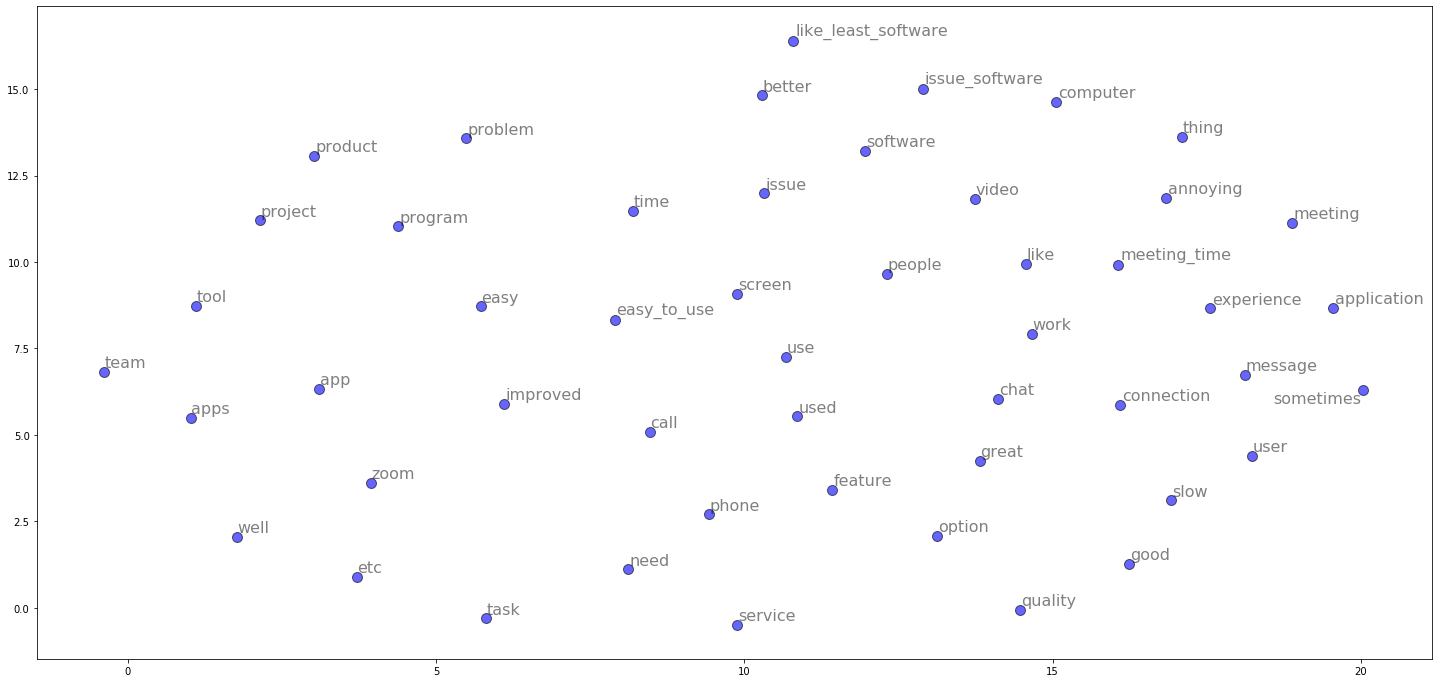

In [34]:
# !pip install adjustText
from adjustText import adjust_text
text = []
for index, row in top100umap.iterrows():
    plt.scatter(row['x'], row['y'], c='b', alpha=0.6, marker='o', s=100, edgecolors='black')
    text.append(plt.annotate(row['token'], alpha=0.5, xy=(row['x'], row['y']), ha='right', va='bottom', size=16))
adjust_text(text)